<a href="https://colab.research.google.com/github/jwxu19/project1/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Movies_and_TV_5.json.gz
!gzip -d reviews_Movies_and_TV_5.json.gz
!ls

--2019-09-07 04:57:02--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Movies_and_TV_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 708988936 (676M) [application/x-gzip]
Saving to: ‘reviews_Movies_and_TV_5.json.gz’

reviews_Movies_and_ 100%[===================>] 676.14M  3.63MB/s    in 84s     

2019-09-07 04:58:25 (8.07 MB/s) - ‘reviews_Movies_and_TV_5.json.gz’ saved [708988936/708988936]

reviews_Movies_and_TV_5.json  sample_data


In [0]:
import json
import numpy as np
import pandas as pd
from scipy import stats

data=[]
for line in open("reviews_Movies_and_TV_5.json","r"):
  data.append(json.loads(line))

data=pd.DataFrame.from_dict(data, orient="columns")

In [0]:
data.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0005019281,"[0, 0]",4.0,This is a charming version of the classic Dick...,"02 26, 2008",ADZPIG9QOCDG5,"Alice L. Larson ""alice-loves-books""",good version of a classic,1203984000
1,0005019281,"[0, 0]",3.0,It was good but not as emotionally moving as t...,"12 30, 2013",A35947ZP82G7JH,Amarah Strack,Good but not as moving,1388361600
2,0005019281,"[0, 0]",3.0,"Don't get me wrong, Winkler is a wonderful cha...","12 30, 2013",A3UORV8A9D5L2E,Amazon Customer,Winkler's Performance was ok at best!,1388361600
3,0005019281,"[0, 0]",5.0,Henry Winkler is very good in this twist on th...,"02 13, 2008",A1VKW06X1O2X7V,"Amazon Customer ""Softmill""",It's an enjoyable twist on the classic story,1202860800
4,0005019281,"[0, 0]",4.0,This is one of the best Scrooge movies out. H...,"12 22, 2013",A3R27T4HADWFFJ,BABE,Best Scrooge yet,1387670400


In [0]:
data.columns

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

In [0]:
data.shape

(1697533, 9)

In [127]:
data.groupby("asin")["reviewerID"].count().reset_index().sort_values("reviewerID", ascending=False).rename(columns={"reviewerID":"# of review"})[:5]

,asin,# of review
40093,B003EYVXV4,2213
35929,B001KVZ6HK,2110
46908,B009934S5M,1974
43590,B0059XTU1S,1746
44156,B005LAIHXQ,1637


In [185]:
n_review_per_movie=data.groupby("asin")["reviewerID"].count()
n_review_per_movie.describe(), stats.describe(n_review_per_movie)

(count    50052.000000
 mean        33.915388
 std         73.466260
 min          5.000000
 25%          7.000000
 50%         13.000000
 75%         29.000000
 max       2213.000000
 Name: reviewerID, dtype: float64,
 DescribeResult(nobs=50052, minmax=(5, 2213), mean=33.91538799648366, variance=5397.291296241137, skewness=8.188931198385541, kurtosis=115.8915129928746))

Text(0, 0.5, 'Count')

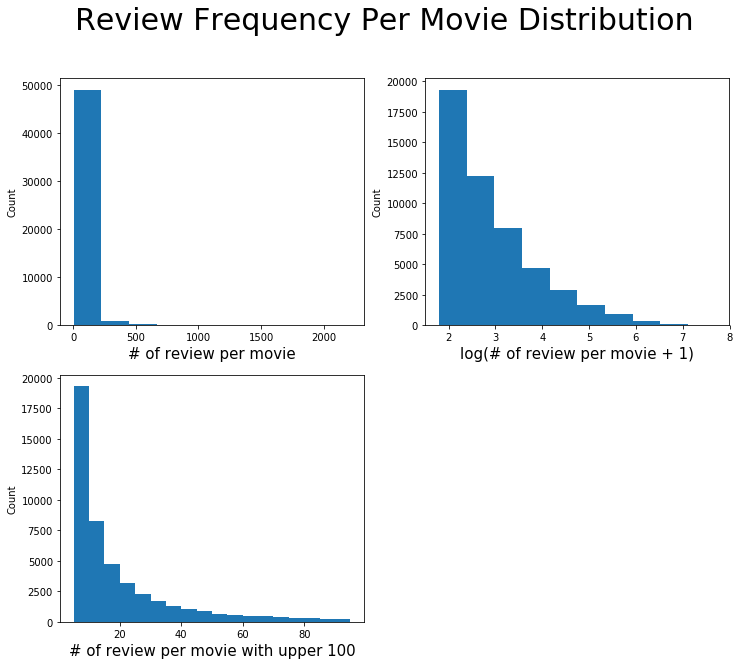

In [183]:
from matplotlib import pyplot as plt


fig=plt.figure(figsize=(12,10))
fig.suptitle("Review Frequency Per Movie Distribution", fontsize=30)

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)

ax1.hist(n_review_per_movie)
ax1.set_xlabel("# of review per movie", fontsize=15)
ax1.set_ylabel("Count")




ax2.hist(np.log(n_review_per_movie+1))
ax2.set_xlabel("log(# of review per movie + 1)", fontsize=15)
ax2.set_ylabel("Count")

ax3.hist(n_review_per_movie, bins=range(min(n_review_per_movie), 100, 5))
ax3.set_xlabel("# of review per movie with upper 100", fontsize=15)
ax3.set_ylabel("Count")


In [167]:
data.groupby("reviewerID")["overall"].count().reset_index().sort_values("overall", ascending=False).rename(columns={"overall":"# of review"})[:5]

,reviewerID,# of review
85592,A3LZGLA88K0LA0,2368
5830,A16CZRQL23NOIW,2333
112512,ANCOMAI0I7LVG,2322
101825,ABO2ZI2Y5DQ9T,2301
67676,A328S9RN3U5M68,2267


In [186]:
n_review_per_user=data.groupby("reviewerID")["overall"].count()
n_review_per_user.describe(), stats.describe(n_review_per_user)

(count    123960.000000
 mean         13.694200
 std          39.750989
 min           5.000000
 25%           5.000000
 50%           7.000000
 75%          11.000000
 max        2368.000000
 Name: overall, dtype: float64,
 DescribeResult(nobs=123960, minmax=(5, 2368), mean=13.694199741852211, variance=1580.14108721121, skewness=24.728837022189687, kurtosis=971.1730805804166))

Text(0, 0.5, 'Count')

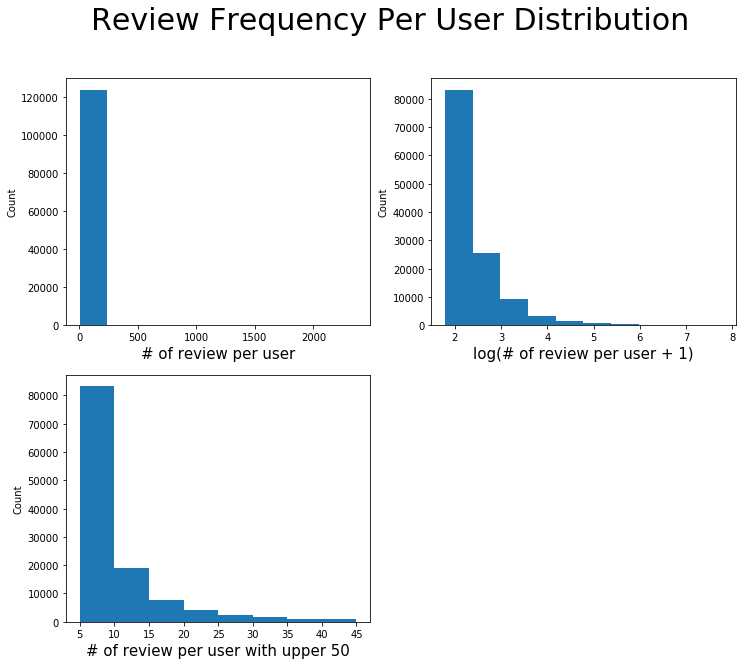

In [187]:
fig=plt.figure(figsize=(12,10))
fig.suptitle("Review Frequency Per User Distribution", fontsize=30)

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)

ax1.hist(n_review_per_user)
ax1.set_xlabel("# of review per user", fontsize=15)
ax1.set_ylabel("Count")


ax2.hist(np.log(n_review_per_user+1))
ax2.set_xlabel("log(# of review per user + 1)", fontsize=15)
ax2.set_ylabel("Count")

ax3.hist(n_review_per_user, bins=range(min(n_review_per_movie), 50, 5))
ax3.set_xlabel("# of review per user with upper 50", fontsize=15)
ax3.set_ylabel("Count")


In [188]:
min_n_review_per_movie, min_n_review_per_user=20, 15

item_ls_filter=data["asin"].value_counts()>min_n_review_per_movie
user_ls_filter=data["reviewerID"].value_counts()>min_n_review_per_user

item_ls_after_filter=item_ls_filter[item_ls_filter].index.tolist()
user_ls_after_filter=user_ls_filter[user_ls_filter].index.tolist()

data_after_filter=data[(data["asin"].isin(item_ls_after_filter)) & (data["reviewerID"].isin(user_ls_after_filter))]

data_after_filter.shape

(743612, 9)

In [190]:
import os
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/My Drive/RecSys"
os.chdir(path)
os.listdir(path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


['user_ls', 'item_ls', 'rating_ls']

In [0]:
import pickle
outfile=open("data_after_filter","wb")
pickle.dump(data_after_filter,outfile)
outfile.close()


In [192]:
!ls

data_after_filter  item_ls  rating_ls  user_ls
